![Tensorflow](https://www.tensorflow.org/images/apple-touch-icon-180x180.png "Tensorflow")

## <u>_Logistic Regression using Tensorflow and Tensorboard_</u>
> #### Using Iris Dataset

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.decomposition import PCA

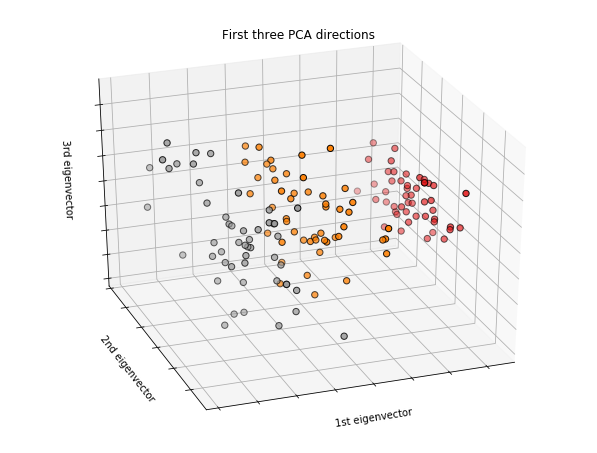

In [2]:
iris = datasets.load_iris()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
           c=iris.target, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [3]:
data = np.copy(iris.data.astype(np.float32))
target = np.zeros((len(iris.target), 3), dtype=np.int32)

for i in range(len(iris.target)):
    target[i, iris.target[i]] = 1

#shuffle data
orig = np.arange(len(data))
perm = np.copy(orig)
np.random.shuffle(perm)

data[orig, :] = data[perm, :]
target[orig] = target[perm]


In [4]:
#split dataset
X_train = data[:-20, :]
Y_train = target[:-20, :]

X_test = data[-20:, :]
Y_test = target[-20:, :]

In [5]:
epoch = 2001
learning_rate = 0.1

X = tf.placeholder(dtype=tf.float32, name='features')
Y = tf.placeholder(dtype=tf.float32, name='labels')

W = tf.Variable(tf.random_normal([4, 3], mean=-0.1, stddev=0.5), name='weights')
b = tf.Variable(tf.random_normal([3], mean=-0.1, stddev=0.5), name='bias')

with tf.name_scope('predicted_label'):
    # sigmoid(X * W + b)
    y_pred = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

with tf.name_scope('loss_function'):
    loss = tf.reduce_mean((-Y * tf.log(y_pred)) - 
                          (1 - Y) * tf.log(1 - y_pred))
    tf.summary.scalar('loss', loss)
    
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.name_scope('accuracy_check'):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1, name='maxOfPredicted'), 
                                        tf.argmax(Y, 1), name='maxOfBinLabel')
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()


In [6]:
merge = tf.summary.merge_all()
writer = tf.summary.FileWriter('./tmp')

In [7]:
with tf.Session() as sess:
    writer.add_graph(sess.graph)
    sess.run(init)
    for step in range(epoch):
        _, summ = sess.run([optimizer, merge], feed_dict={
            X: X_train, Y: Y_train
        })
        writer.add_summary(summ, step)
    fd_test = {X: X_test, Y: Y_test}
    fd_train = {X: X_train, Y: Y_train}
    print('test accuracy = %10.2f' % sess.run(accuracy, fd_test))
    print('train accuracy = %10.2f' % sess.run(accuracy, fd_train))

test accuracy =       1.00
train accuracy =       0.96
